# Stage 3

<br>

<font color=red>**최종 학습 목표**</font>

* 신용카드 사기거래 탐지 프로젝트를 통해 여러분은 이상치 감지를 훌륭히 수행할 수 있는 데이커가 되는 것에 한 발짝 더 다가가게 될 것입니다.

* 이 뿐만 아니라 이번 교육을 통해 키운 역량은 다른 곳에서도 큰 도움이 될 것이라 기대합니다.<br>

<br><font color=red>**Stage 3 학습 목표**</font>

* 지도 학습과 비지도 학습의 문제 접근 방식을 이해한다.

* 다양한 머신러닝 모델을 이해한다.

* 딥러닝은 무엇인지 이해한다.

* 사용할 수 있는 성능지표를 이해한다.

* 과소 적합과 과대 적합을 이해한다.

* 성능을 개선시킬 수 있는 방안들을 이해한다.<br><br>

# 1. Intro

<br>

**데이커 여러분 환영합니다.** 🤗 

지난 Stage 2에서는 데이터 전처리와 특성 공학에 대해 배워보았습니다.

이번 Stage 3에서는 본격적으로 머신러닝을 활용하여 이상지 감지를 해보겠습니다. 그러기 위해서 전반적으로 모델이 어떻게 학습하는지 배우며 성능이 좋은 모델이란 무엇인지 이해하고자 합니다.

여러분들은 Hint와 함께 퀴즈 및 실습을 통해 차근차근 성장해 나갈 것입니다.

그럼 이제 고고씽 ~ ! 🚅<br><br>

# 2. 프로젝트 배경

<br>

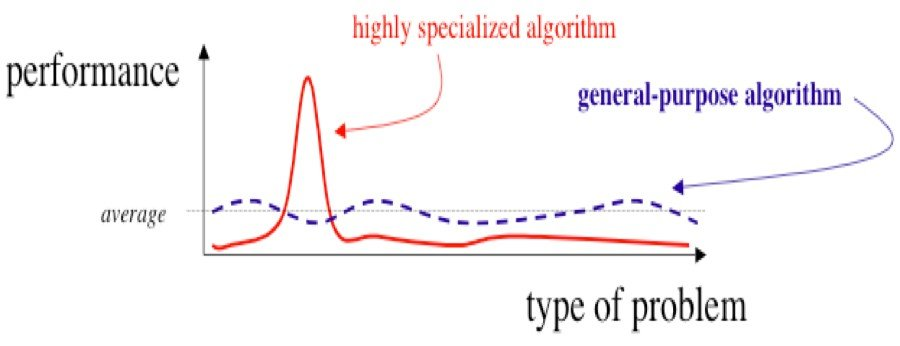

<br>

**머신러닝에서도 공짜 점심은 없다.** (*No Free Lunch Theorems*)<br><br>

  * 금융권에서 통용되는 **"언제나 기회 비용이 발생한다"**라는 뜻의 이 말은 머신러닝 업계에서도 사용되고 있습니다.<br><br>

  * 1996년 David Wolperts와 William Macready 교수는 논문 [⌜No Free Lunch Theorems for Optimization⌟](https://ieeexplore.ieee.org/document/585893)에서 다음과 같이 말하였습니다.<br><br>

  * "We have dubbed the associated results “No Free Lunch” theorems because they demonstrate that if an algorithm perfoms well on a certian class of problems then it necessarily pays for that with degraded performance on the set of all remaining problems." <br><br>

  * 디사 말해, 어떠한 문제 및 데이터에 최적화된 알고리즘이라도 다른 문제나 데이터에는 적합하지 않을 수 있기에 **새로운 문제를 해결하기 위해서는 다시 비용 (시간과 노력)을 지불하고 다양한 머신러닝 기법을 적용시켜봐야 한다**는 뜻입니다.<br><br>

  * 그렇기에 여러분은 매번 새롭게 등장하는 문제를 해결하기 위해 다양한 머신러닝 엔지니어링 기법을 익혀야 합니다.<br><br>

## 3 - 1 데이터 셋 분할

<br>

**수집된 데이터 셋과 미래에 발생할 데이터 셋**<br><br>

  * 전처리와 특성 공학 과정을 거친 데이터는 모델을 학습시키는 데 사용될 것입니다.<br><br>

  * 그리고 미래에 생성된 데이터 셋은 학습된 모델에 의해 신용카드 거래가 사기 거래 여부를 측정되게 될 것입니다.<br><br>

  * **새롭게 발생한 데이터에 대해 모델이 사기 거래 식별을 사전에 잘 하는 지 알 수 있는 방법은 없을까요?**<br><br>

**데이터 셋 분할**<br><br>

  * 학습시키지 않은 데이터에서도 모델이 잘 작동하는 지 알기 위해 **데이터 셋을 분할하는 것**입니다.<br><br>

  * 전처리와 특성 공학 과정을 거친 데이터를 모두 학습시키지 않고 일부는 학습시키지 않는 것입니다.<br><br>

  * 그렇게 우리는 훈련 데이터 셋과 검증 데이터 셋 두 가지 데이터 셋을 사용할 수 있습니다.<br><br>

    - **훈련 데이터 셋** : 모델을 학습시키는 데 사용됩니다.<br><br>

    - **검증 데이터 셋** : 학습된 모델을 성능을 평가하는 데 사용되며, 성능 결과에 따라 모델 학습 이전의 과정을 수정하는 데 참고합니다.<br><br>

**수집된 데이터를 훈련 데이터 셋과 검증 데이터 셋으로 분할하기**

In [51]:
# 데이터 불러오는 방법은 Stage 1 참조

import pandas as pd

val = pd.read_csv('./val.csv')

In [52]:
# 사전에 훈련 데이터 셋과 검증 데이터 셋이 분할되어 있지만 직접 데이터 셋을 분할하여 봅시다.

# sklearn 라이브러리에서 model_selection 중에서 train_test_split를 불러옵니다.
from sklearn.model_selection import train_test_split

In [53]:
# 'val' 데이터 셋을 설명 변수와 목표 변수로 구분합니다.

X = val.drop(columns=['Class'])
y = val[['Class']]

In [54]:
X_train, X_val, y_train, y_val = train_test_split(
                                    X, # 설명 변수
                                    y, # 목표 변수
                                    test_size=0.2, # 전체 데이터 셋 중에서 검증 데이터 셋으로 사용할 비율
                                    stratify=y # 기존 데이터 셋의 Class 비율을 유치 한 채로 데이터 셋을 분할
                                                  )

In [55]:
# 데이터 셋이 잘 분할하였는지 확인
print(X_train.shape) # 훈련 데이터 셋 설명 변수
print(X_val.shape) # 검증 데이터 셋 설명 변수
print(y_train.shape) # 훈련 데이터 셋 목표 변수
print(y_val.shape) # 훈련 데이터 셋 목표 변수

(22769, 31)
(5693, 31)
(22769, 1)
(5693, 1)


In [56]:
# Class 비율이 어느 정도 비슷하다는 것을 확인할 수 있습니다.
print(val['Class'].value_counts())
print(y_train['Class'].value_counts())
print(y_val['Class'].value_counts())

0    28432
1       30
Name: Class, dtype: int64
0    22745
1       24
Name: Class, dtype: int64
0    5687
1       6
Name: Class, dtype: int64


<br>

**대회에서 제공된 데이터 셋**<br><br>

  * 신용카드 사기거래 식별 AI 경진 대회애서는 4가지 데이터 셋을 제공해주어 우리가 데이터 셋을 분할할 필요는 없습니다.<br><br>

    - **train.csv** : 훈련 데이터 셋으로 인사이트를 발견하거나 모델을 학습시키는 데 사용됩니다.<br><br>

    - **val.csv** : 학습된 모델이 학습시키지 않은 데이터 셋에서도 잘 작동하는 지 평가하는 데 사용됩니다.<br><br>

    - **test.csv** : 테스트 데이터 셋으로서 미래에 발생할 데이터 셋이라고 가정하고, 대회 성적을 평가하기 위해 사용됩니다.<br><br>

    - **sample_submission.csv** : 테스트 데이터 셋에 대한 모델의 예측 결과를 최종적으로 출력하는 데이터 셋입니다.<br><br>

## 3 - 2 이상치 감지를 위한 지도 학습 기반 모델

<br>

**Tree Based Model**

<br>

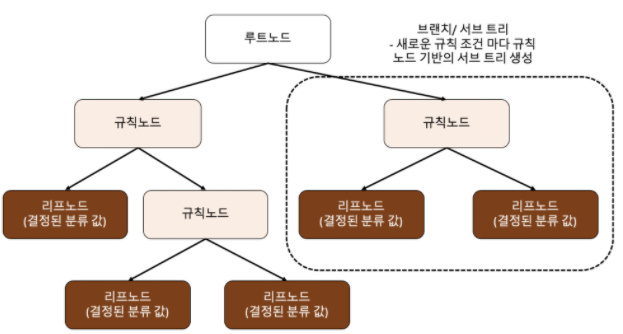

<br>



<br>

**다양한 머신러닝 모델 중에서 트리 기반 모델에 대해 자세히 알아봅시다.**

<br>

<br>

**구조**<br><br>

  * 뿌리부터 시작하여 점차 가지를 뻗어 나가는 나무를 뒤집은 모양입니다.<br><br>

  * **루트 노드** : 트리가 처음으로 시작된 곳입니다.<br><br>

  * **규칙 노드** : 데이터의 특성에 조건을 제시하는 곳입니다.<br><br>

  * **리프 노드** : 규칙 노드에 따라 결정된 샘플 데이터가 있는 곳입니다.<br><br>

  * **서브 트리** : 새로운 규칙 조건마다 생성되는 작은 트리입니다.<br><br>

**작동 방식**<br><br>

  1. 데이터의 특정 특성에 대해 **특정 조건을 제시하여 데이터를 분류**합니다.<br><br>

  2. 분류된 데이터들은 다시 1번 과정을 반복합니다. (트리의 깊이가 깊어져 갑니다.)<br><br>

  3. 분류된 데이터가 **더이상 불순도가 없는 상태** (*더 이상 분류할 수 없는 상태*)가 되었을 때 반복을 멈춥니다.<br><br>

**Ensemble**

<br>

"**나무를 보지말고 숲을 봐라**"라는 말이 있듯이 하나의 트리 기반 모델보다 여러 개의 모델을 사용하면 더 좋을 결과를 얻을 수 있을 것입니다.

여러 모델을 통해 활용하여 최종 결과를 도출하는 것을 **앙상블** (*Ensemble*)이라고 합니다.

<br>

**앙상블 (Ensemble)**<br><br>

  * 앙상블에는 다음의 여러 기법이 존재합니다.<br><br>

  * **Voting** : **여러 알고리즘 모델이 내놓은 결과를 평균값 계산 혹은 투표**하여 최종 결과를 도출하는 것입니다.<br><br>

  * **Bagging** : **데이터를 복원 추출**하여 각 표본에 대해 모델을 학습시킨 후, 내놓은 결과를 **평균값 계산 혹은 투표**를 통해 최종 결과값으로 도출하는 것입니다.<br><br>

  * **Boosting** : 하나의 모델이 내놓은 **결과 중에 틀린 것에 대해 다음의 모델이 집중**하여 성능을 높입니다. 그리고 이전 모델을 이어서 학습한 모델들이 내놓은 결과를 **평균값 계산 혹은 투표**하여 최종 결과를 도출합니다.<br><br>

<br>

### Random Forest

<br>

Random Forest는 **데이터의 특성을 무작위 복원 추출**하여 일부 특성만 사용하는 **Bagging**이라는 기법을 통해 여러 개의 트리 기반 모델을 만듭니다.

그리고 다수의 트리 기반 모델이 **도출한 결과를 평균값으로 계산 혹은 다수결로 투표**하여 최종 결과로 제출합니다.

<br>

In [57]:
# sklearn 라이브러리에서 ensemble 중에서 RandomForestClassifier를 불러옵니다.
from sklearn.ensemble import RandomForestClassifier

# 회귀 문제인 경우
from sklearn.ensemble import RandomForestRegressor

In [58]:
# 모델을 용이하게 사용하게 별도로 변수로 지정합니다.
model = RandomForestClassifier(
    n_estimators=100, # 몇 개의 트리 기반 모델을 생성할 것인지 결정합니다.
    criterion='gini', # 불순도를 평가하는 방식을 결정합니다.
    min_samples_leaf=2, # 리프 노드가 되기 위한 최소한의 샘플 데이터 수
    min_samples_split=10, # 노드를 분할하기 위한 최소한 데이터의 수 입니다.
    
    # None으로 설정 시, 최대치로 설정됩니다.
    max_depth=10, # 트리의 깊이의 최대치를 결정합니다.
    max_features=15, # 무작위로 복원 추출할 특성의 개수를 결정합니다.
    max_leaf_nodes=200 # 리프 노드의 최대 개수를 결정합니다.
)

In [59]:
# 훈련 데이터 셋을 모델에 학습시킵니다.
model.fit(X_train, # 설명 변수
          y_train) # 목표 변수

<ipython-input-59-1c8e42de08ef>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, # 설명 변수


RandomForestClassifier(max_depth=10, max_features=15, max_leaf_nodes=200,
                       min_samples_leaf=2, min_samples_split=10)

In [60]:
# 훈련 데이터 셋과 검증 데이터 셋 정확도를 각각 측정해봅시다.
# sklearn 라이브러리에서 metrics 중에서 accuracy_score를 불러옵니다.
from sklearn.metrics import accuracy_score

<br>

**훈련 데이터 셋 정확도**

<br>

In [61]:
# 훈련 데이터 셋에 대한 모델의 추론 결과를 도출합니다.
y_train_pred = model.predict(X_train)

# 추론 결과와 정답을 비교해봅시다.
y_train['Predict'] = y_train_pred

# 정상 거래 : 0 / 사기 거래 : 1
display(y_train.head())

train_valaccuracy = accuracy_score(y_train['Class'], y_train['Predict'])
print(f'\n훈련 데이터 셋 정확도 : {train_valaccuracy}\n')

,Class,Predict
6861,0,0
3134,0,0
17743,0,0
19919,0,0
5965,0,0



훈련 데이터 셋 정확도 : 0.9996486450876191



<br>

**검증 데이터 셋 정확도**

<br>

In [62]:
# 검증 데이터 셋에 대한 모델의 추론 결과를 도출합니다.
y_val_pred = model.predict(X_val)

# 추론 결과와 정답을 비교해봅시다.
y_val['Predict'] = y_val_pred

# 정상 거래 : 0 / 사기 거래 : 1
display(y_val.head())

val_valaccuracy = accuracy_score(y_val['Class'], y_val['Predict'])
print(f'\n검증 데이터 셋 정확도 : {val_valaccuracy}\n')

,Class,Predict
20801,0,0
2980,0,0
26171,0,0
13860,0,0
17248,0,0



검증 데이터 셋 정확도 : 0.9994730370630599



<br>

### XGBoost

<br>

XGBoost는 **하나의 모델이 내놓은 결과 중에 틀린 정도를 줄이기 위해 다음의 모델이 집중적으로 개선**해 나가는 **Gradient Boosting**이라는 기법을 사용하여 **병렬적으로 모델**을 학습시킵니다.

Gradient Boosting이란 틀린 정도를 줄이기 위해 모델이 사용한 수학 공식에 **Learing Rate를 변경하면서 학습하는 것**입니다.

Random Forest처럼 하이퍼 파라미터 설정 (*colsample_bytree*)을 통해 Bagging을 수행할 수 있습니다.

아래의 그림 중 마지막 단계를 '0.1'로 설정된 Learing Rate가 보입니다.

이처럼 XGBoost가 Learing Rate를 통해 수학 공식을 변경시키면서 틀린 정도를 줄일 수 있습니다.

<br>

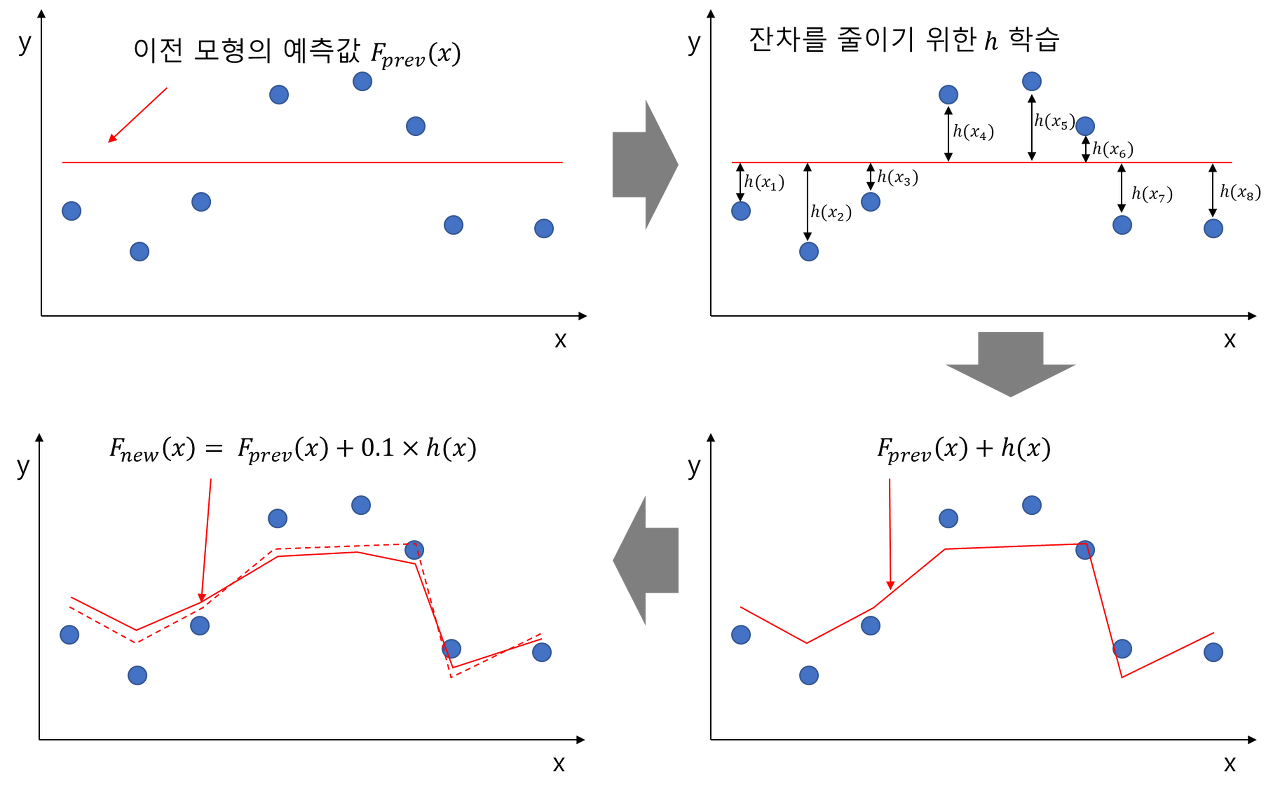

In [79]:
X_train, X_val, y_train, y_val = train_test_split(
                                    X, # 설명 변수
                                    y, # 목표 변수
                                    test_size=0.2, # 전체 데이터 셋 중에서 검증 데이터 셋으로 사용할 비율
                                    stratify=y # 기존 데이터 셋의 Class 비율을 유치 한 채로 데이터 셋을 분할
                                                  )

In [80]:
# xgboost 라이브러리에서 XGBClassifier를 불러옵니다.
from xgboost import XGBClassifier

# 회귀 문제인 경우
from xgboost import XGBRegressor

In [81]:
# 모델을 용이하게 사용하게 별도로 변수로 지정합니다.
model = XGBClassifier(
    n_estimators=100, # 몇 개의 트리 기반 모델을 생성할 것인지 결정합니다.
    learning_rate=0.01, # learing Rate 값을 설정합니다.
    max_depth=10, # 트리의 깊이의 최대치를 결정합니다.
    min_child_weight=2, # 리프 노드가 되기 위한 최소한의 샘플 데이터 수
    gamma=0, #  리프 노드를 추가로 생성할 지 결정하는 최소 손실 감소 값을 결정합니다.
    colsample_bytree=0.5,  # 무작위로 복원 추출할 특성의 비율을 결정합니다.
    sub_sample=1, # 학습 시 사용할 데이터 샘플의 비율을 결정합니다.
    reg_lambda=1, # L2 규제에 적용할 값을 결정합니다.
    reg_alpha=0, # L1 규제에 적용할 값을 결정합니다.
    scale_pos_weight=1, # 데이터가 불균형 할때 사용,
                      )

In [82]:
# 훈련 데이터 셋을 모델에 학습시키고 검증 데이터 셋에 대한 결과를 확인합니다..
model.fit(X_train, # 설명 변수
          y_train, # 목표 변수
          eval_metric='error', # 검증 데이터 셋 평가 지표 / 'error' : binary classification error rate
          eval_set=[(X_val, y_val)], # 검증 데이터 셋
          early_stopping_rounds=10 # 검증 데이터 셋에 다한 평가 지표가 개선되지 않는 최대 반복 횟수를 설정합니다.
          ) 

[0]	validation_0-error:0.000527
Will train until validation_0-error hasn't improved in 10 rounds.
[1]	validation_0-error:0.000878


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2]	validation_0-error:0.000176
[3]	validation_0-error:0.000176
[4]	validation_0-error:0.000351
[5]	validation_0-error:0.000351
[6]	validation_0-error:0.000351
[7]	validation_0-error:0.000527
[8]	validation_0-error:0.000527
[9]	validation_0-error:0.000527
[10]	validation_0-error:0.000351
[11]	validation_0-error:0.000527
[12]	validation_0-error:0.000351
Stopping. Best iteration:
[2]	validation_0-error:0.000176



XGBClassifier(colsample_bytree=0.5, learning_rate=0.01, max_depth=10,
              min_child_weight=2, sub_sample=1)

In [83]:
# 훈련 데이터 셋과 검증 데이터 셋 정확도를 각각 측정해봅시다.
# sklearn 라이브러리에서 metrics 중에서 accuracy_score를 불러옵니다.
from sklearn.metrics import accuracy_score

In [84]:
# 훈련 데이터 셋에 대한 모델의 추론 결과를 도출합니다.
y_train_pred = model.predict(X_train)

# 추론 결과와 정답을 비교해봅시다.
y_train['Predict'] = y_train_pred

# 정상 거래 : 0 / 사기 거래 : 1
display(y_train.head())

train_valaccuracy = accuracy_score(y_train['Class'], y_train['Predict'])
print(f'\n훈련 데이터 셋 정확도 : {train_valaccuracy}\n')

,Class,Predict
20271,0,0
16231,0,0
11635,0,0
406,0,0
9955,0,0



훈련 데이터 셋 정확도 : 0.9996486450876191



In [85]:
# 검증 데이터 셋에 대한 모델의 추론 결과를 도출합니다.
y_val_pred = model.predict(X_val)

# 추론 결과와 정답을 비교해봅시다.
y_val['Predict'] = y_val_pred

# 정상 거래 : 0 / 사기 거래 : 1
display(y_val.head())

val_valaccuracy = accuracy_score(y_val['Class'], y_val['Predict'])
print(f'\n검증 데이터 셋 정확도 : {val_valaccuracy}\n')

,Class,Predict
2725,0,0
16403,0,0
11989,0,0
2740,0,0
15942,0,0



검증 데이터 셋 정확도 : 0.9998243456876866



<br>

### LGBM

<br>

### CatBoost

## 3 - 3 이상치 감지를 위한 비지도 학습 기반 모델

### LOF

### Isolate Forest

### Auto Encoder

### GAN

## 3 - 4 성능 지표 

### 혼동 행렬

**정확도**

**정밀도**

**재현도**

### F - 1 Score



### ROC-Curve

**AUC**

## 3 - 5 과소 적합과 과대 적합

### 과소 적합

### 과대 적합

---
---

# 추론 결과를 데이콘에 제출하기

# END